In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from dask.multiprocessing import get
import dask.array as da
from pymks.fmks.bases.legendre import LegendreTransformer
import numpy as np
n_states = 3
domain = [-1, 1]

from pymks.bases import LegendreBasis
from pymks.fmks.data.cahn_hilliard import generate, solve
leg_basis = LegendreBasis(n_states=n_states, domain=domain)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
reducer = PCA(n_components=3)
linker = LogisticRegression()

In [7]:
data = generate(shape=(100, 41, 41), chunks=(40, 41, 41), delta_t=1e-2)

In [8]:
X0,X1= data
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])
X = np.concatenate((X0, X1))
y = np.concatenate((y0, y1))

In [9]:
aaa=LegendreTransformer(n_state=3,min_=domain[0],max_=domain[1]).transform(X1)

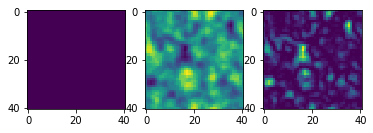

In [13]:
import matplotlib.pyplot as plt

plt.subplot(131)
plt.imshow(aaa[0,:,:,0])
plt.subplot(132)
plt.imshow(aaa[0,:,:,1])
plt.subplot(133)
plt.imshow(aaa[0,:,:,2])


In [24]:
np.array(aaa[0,:,:,1])

array([[-0.18336003, -0.10396436, -0.07879285, ..., -0.12013544,
        -0.22740154, -0.23101409],
       [-0.11662808, -0.11447337, -0.1584342 , ..., -0.08685772,
        -0.22414353, -0.23867674],
       [-0.10802399, -0.17290015, -0.21241056, ..., -0.08738205,
        -0.14348812, -0.16721413],
       ...,
       [-0.10882273, -0.10718828, -0.04304691, ..., -0.14683324,
        -0.04203467,  0.01244876],
       [-0.11972769, -0.06655921,  0.05691418, ..., -0.17299878,
        -0.04445113, -0.00821481],
       [-0.15779722, -0.10558066,  0.02631669, ..., -0.18833836,
        -0.18382168, -0.13541006]])